In [3]:
from pandas import Series, DataFrame
import pandas as pd
import calendar
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Setup

In [4]:
#read data in, appended 2014/2015, removed GO from col names
crime2014 = pd.read_csv("https://raw.githubusercontent.com/sxzhu/mis381_project/master/data/Austin_Crime_2014.csv", dtype=unicode, encoding='utf-8')
crime2014[:3]

crime2015 = pd.read_csv("https://raw.githubusercontent.com/sxzhu/mis381_project/master/data/Austin_Crime_2015.csv", dtype=unicode, encoding='utf-8')
crime = crime2014.append(crime2015,ignore_index=True)

crime = crime.rename(index=str, columns={"Highest NIBRS/UCR Offense Description": "General Offense Description",\
                                 "GO Highest Offense Desc":"Detailed Offense Description",\
                                 "GO Location":"Location","GO Report Date":"Report Date",\
                                 "GO Location Zip":"Zipcode","GO District":"District","GO Census Tract":"Census Tract",\
                                 "GO X Coordinate":"X Coordinate","GO Y Coordinate":"Y Coordinate",\
                                      "GO Primary Key":"Primary Key"})

crime = crime.drop('Location_1', axis=1)
crime['Date'] = pd.DatetimeIndex(crime['Report Date'])
crime['Month'] = pd.DatetimeIndex(crime['Date']).month
crime['Month'] = crime['Month'].apply(lambda x: calendar.month_abbr[x])
crime['Year'] = pd.DatetimeIndex(crime['Report Date']).year

crime.head()

,Clearance Date,Clearance Status,Council District,Census Tract,District,Detailed Offense Description,Location,Zipcode,Primary Key,Report Date,X Coordinate,Y Coordinate,General Offense Description,Date,Month,Year
0,04/28/2014 12:00:00 AM,N,1,18.350000000000001,E,AGG ROBBERY/DEADLY WEAPON,12151 N IH 35 SVRD NB ...,78753,20141061920,04/17/2014 12:00:00 AM,3135985,10117220,Robbery,2014-04-17,Apr,2014
1,05/20/2014 12:00:00 AM,N,1,21.13,I,ROBBERY BY ASSAULT,3300 BLOCK ROCKHURST LN ...,78723,20141150937,04/25/2014 12:00:00 AM,3137985,10087946,Robbery,2014-04-25,Apr,2014
2,05/13/2014 12:00:00 AM,N,3,9.02,C,ROBBERY BY THREAT,E 7TH ST / CHICON ST ...,78702,20141310316,05/11/2014 12:00:00 AM,3120890,10068910,Robbery,2014-05-11,May,2014
3,03/24/2015 12:00:00 AM,C,1,21.04,I,AGG ROBBERY/DEADLY WEAPON,WHELESS LN / BERKMAN DR ...,78723,20141670098,06/16/2014 12:00:00 AM,3130566,10089446,Robbery,2014-06-16,Jun,2014
4,10/02/2014 12:00:00 AM,N,3,9.02,G,AGG ROBBERY/DEADLY WEAPON,WALLER ST / E 2ND ST ...,78702,20142070292,07/26/2014 12:00:00 AM,3117732,10068195,Robbery,2014-07-26,Jul,2014


## Merge Crimes

In [5]:
def merge_crimes(s):
    """Map some crimes together."""
    
    # Create a map of misspellings to correct spelling
    misspellings = {'Burglary / \r\nBreaking & Entering':'Burglary',
                    'Auto Theft':'Theft: Auto Parts',
                    'Homicide: Murder & Nonnegligent Manslaughter':'Murder',
                    'Agg Assault':'Aggravated Assault'}
    
    if s in misspellings:
        return misspellings[s]
    else:
        return s
    
# Apply the function to the Series
crime['General Offense Description'] = crime['General Offense Description'].map(merge_crimes)

def merge_theft(s):
    """Map some crimes together."""
    
    if (s[:5]=='Theft'):
        return s[:5]
    else:
        return s
    
# Apply the function to the Series
crime['General Offense Description'] = crime['General Offense Description'].map(merge_theft)

# Check that it worked
# mask = (crime['General Offense Description'] == 'Agg Assault')
# crime['General Offense Description'][mask]  # should be empty

crime['General Offense Description'].value_counts()

Theft                               61908
Burglary / \nBreaking & Entering     5670
Burglary                             4927
Aggravated Assault                   3803
Robbery                              1809
Rape                                 1042
Murder                                 55
Name: General Offense Description, dtype: int64

# Final Dataframe

In [6]:
crime.head()

,Clearance Date,Clearance Status,Council District,Census Tract,District,Detailed Offense Description,Location,Zipcode,Primary Key,Report Date,X Coordinate,Y Coordinate,General Offense Description,Date,Month,Year
0,04/28/2014 12:00:00 AM,N,1,18.350000000000001,E,AGG ROBBERY/DEADLY WEAPON,12151 N IH 35 SVRD NB ...,78753,20141061920,04/17/2014 12:00:00 AM,3135985,10117220,Robbery,2014-04-17,Apr,2014
1,05/20/2014 12:00:00 AM,N,1,21.13,I,ROBBERY BY ASSAULT,3300 BLOCK ROCKHURST LN ...,78723,20141150937,04/25/2014 12:00:00 AM,3137985,10087946,Robbery,2014-04-25,Apr,2014
2,05/13/2014 12:00:00 AM,N,3,9.02,C,ROBBERY BY THREAT,E 7TH ST / CHICON ST ...,78702,20141310316,05/11/2014 12:00:00 AM,3120890,10068910,Robbery,2014-05-11,May,2014
3,03/24/2015 12:00:00 AM,C,1,21.04,I,AGG ROBBERY/DEADLY WEAPON,WHELESS LN / BERKMAN DR ...,78723,20141670098,06/16/2014 12:00:00 AM,3130566,10089446,Robbery,2014-06-16,Jun,2014
4,10/02/2014 12:00:00 AM,N,3,9.02,G,AGG ROBBERY/DEADLY WEAPON,WALLER ST / E 2ND ST ...,78702,20142070292,07/26/2014 12:00:00 AM,3117732,10068195,Robbery,2014-07-26,Jul,2014


## Example Stacked Graph

Total crime count: 8491


Theft                               7243
Burglary / \nBreaking & Entering     316
Aggravated Assault                   300
Burglary                             282
Robbery                              206
Rape                                 141
Murder                                 3
Name: General Offense Description, dtype: int64


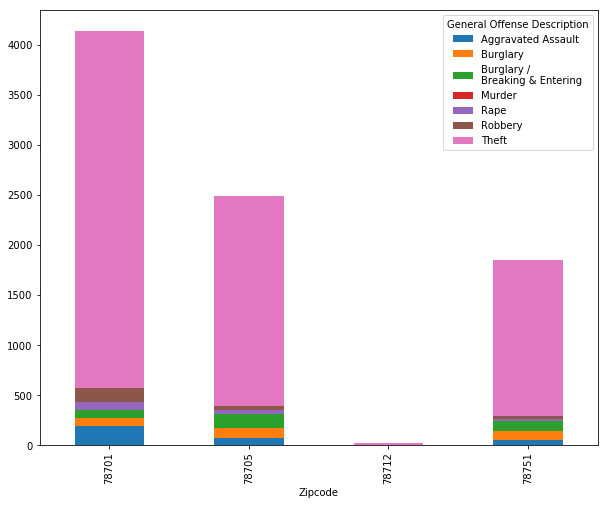

In [7]:
crime_wc = crime['Zipcode']=="78705"
crime_ut = crime['Zipcode']=="78712"
crime_hyde = crime['Zipcode']=="78751"
crime_dt = crime['Zipcode']=="78701"
area_mask = crime_wc | crime_ut | crime_hyde | crime_dt

#print(area_mask)

crime_student = crime[area_mask]

pylab.rcParams['figure.figsize'] = (10, 8)

test5 = crime_student.groupby(['Zipcode', 'General Offense Description'])['Zipcode'].count().unstack('General Offense Description').fillna(0)
test5.plot(kind='bar', stacked=True)


# total crime count
print "Total crime count:", crime_student['General Offense Description'].count()

# crime split into offenses
crime_student_vc = crime_student['General Offense Description'].value_counts()
print "\n"
print(crime_student_vc)
#crime_student_vc.plot(kind='bar')


In [8]:
crime[:3]

,Clearance Date,Clearance Status,Council District,Census Tract,District,Detailed Offense Description,Location,Zipcode,Primary Key,Report Date,X Coordinate,Y Coordinate,General Offense Description,Date,Month,Year
0,04/28/2014 12:00:00 AM,N,1,18.350000000000001,E,AGG ROBBERY/DEADLY WEAPON,12151 N IH 35 SVRD NB ...,78753,20141061920,04/17/2014 12:00:00 AM,3135985,10117220,Robbery,2014-04-17,Apr,2014
1,05/20/2014 12:00:00 AM,N,1,21.13,I,ROBBERY BY ASSAULT,3300 BLOCK ROCKHURST LN ...,78723,20141150937,04/25/2014 12:00:00 AM,3137985,10087946,Robbery,2014-04-25,Apr,2014
2,05/13/2014 12:00:00 AM,N,3,9.02,C,ROBBERY BY THREAT,E 7TH ST / CHICON ST ...,78702,20141310316,05/11/2014 12:00:00 AM,3120890,10068910,Robbery,2014-05-11,May,2014


### Converting NaN values in Clearance Status column to be Not Cleared 

In [9]:
crime[crime['General Offense Description']=='Murder']#['Clearance Status'] 
#there are missing values in the original DF--should we make these not cleared?
crime[crime['Clearance Status'].isnull()]['General Offense Description'].value_counts() 
#What should we do about the null clearance status??? Let's make them Not Cleared
crime['Clearance Status']=crime['Clearance Status'].fillna('N')
sum(crime['Clearance Status'].isnull())

0

### Converting dates to datetime and adding new Clearance Time column

In [10]:
crime['Report Date']=pd.to_datetime(crime['Report Date'])
crime['Clearance Date']=pd.to_datetime(crime['Clearance Date'])
crime['Clearance Time']=crime['Clearance Date']-crime['Report Date']
crime['Clearance Time']=crime['Clearance Time'].dt.days #converted it to int
crime[:3]

,Clearance Date,Clearance Status,Council District,Census Tract,District,Detailed Offense Description,Location,Zipcode,Primary Key,Report Date,X Coordinate,Y Coordinate,General Offense Description,Date,Month,Year,Clearance Time
0,2014-04-28,N,1,18.350000000000001,E,AGG ROBBERY/DEADLY WEAPON,12151 N IH 35 SVRD NB ...,78753,20141061920,2014-04-17,3135985,10117220,Robbery,2014-04-17,Apr,2014,11.0
1,2014-05-20,N,1,21.13,I,ROBBERY BY ASSAULT,3300 BLOCK ROCKHURST LN ...,78723,20141150937,2014-04-25,3137985,10087946,Robbery,2014-04-25,Apr,2014,25.0
2,2014-05-13,N,3,9.02,C,ROBBERY BY THREAT,E 7TH ST / CHICON ST ...,78702,20141310316,2014-05-11,3120890,10068910,Robbery,2014-05-11,May,2014,2.0


### Clearance Time histogram

In [11]:
crime[crime['Clearance Time'].isnull()]['General Offense Description'] #there are nulls in clearance time also- fill in with avg
crime['Clearance Time']=crime['Clearance Time'].fillna(mean)
sum(crime['Clearance Time'].isnull())

0

In [12]:
#IGNORE
# # crime.hist(column='Clearance Time',by='General Offense Description', bins=15, stacked=True)
# # #.set(xlabel='Days to Clear',ylabel='Number of Crimes',title='Days to Clear Based on Crime')
# # crime.hist(column='Clearance Time', bins=30)
# # #crime['Clearance Time']=crime['']

# # #pivot=pd.pivot(crime, index=['General Offense Description'],columns=['Clearance Status'])
# stuff = crime.groupby(['General Offense Description', 'Clearance Time'])['General Offense Description'].count()
# x=stuff.unstack().T / stuff.unstack().sum(axis=1) 
# #hist(stacked=True)
# #graph of percent of crimes clearaed on certain days (line)

# #stuff.unstack().T.plot(xlim=(0,100)) #number of crimes cleared on certain days
# #want percentages

# #x.apply(cumsum).plot(xlim=(0,100))
# x.apply(cumsum)
# x.apply(cumsum).fillna(method='ffill').plot(xlim=(0,100)).set(xlabel='Clearance Time',\
#                                                               ylabel='Cumulative Percent of Crimes Cleared',\
#                                                              title='Cumulative Percent of Crimes Cleared based on Time')


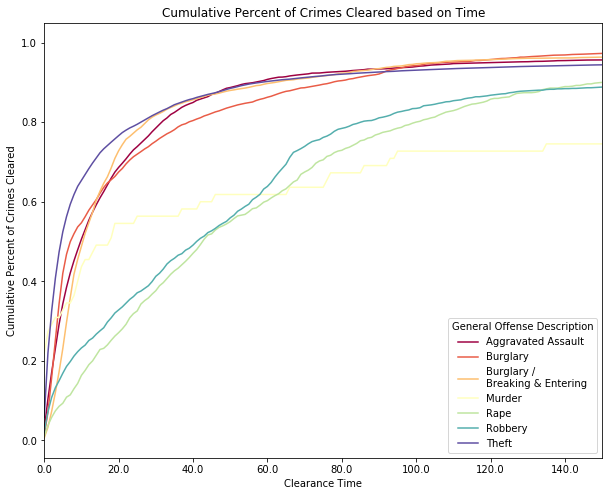

In [13]:
clear_time_based_on_crime = crime.groupby(['General Offense Description', 'Clearance Time'])['General Offense Description'].count()
CT_crime_unstack=clear_time_based_on_crime.unstack().T / clear_time_based_on_crime.unstack().sum(axis=1) 


CT_crime_unstack.apply(cumsum) #makes values in table cumulative--shows % cleared at this time
CT_crime_unstack.apply(cumsum).fillna(method='ffill').plot(xlim=(0,150),colormap='Spectral').set(xlabel='Clearance Time',\
                                                              ylabel='Cumulative Percent of Crimes Cleared',\
                                                             title='Cumulative Percent of Crimes Cleared based on Time')
CT_crime_unstack.apply(cumsum)

General Offense Description,Aggravated Assault,Burglary,Burglary / Breaking & Entering,Murder,Rape,Robbery,Theft
Clearance Time,,,,,,,
59.0,0.964666,0.767956,0.807566,NaN,0.580407,0.735507,0.922106
60.0,0.966369,0.769797,0.810855,NaN,0.582255,0.742754,0.923253


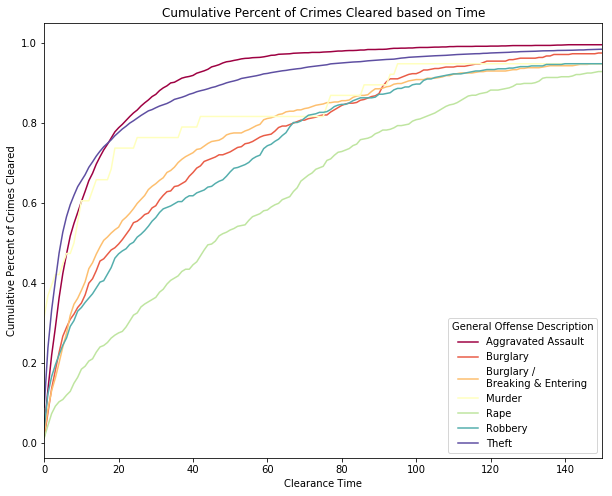

In [25]:
mask=(crime['Clearance Status']=='N')
crime_C_or_O=crime[~mask]

clear_time_based_on_crime = crime_C_or_O.groupby(['General Offense Description', 'Clearance Time'])['General Offense Description'].count()
CT_crime_unstack=clear_time_based_on_crime.unstack().T / clear_time_based_on_crime.unstack().sum(axis=1) 


CT_crime_unstack.apply(cumsum) #makes values in table cumulative--shows % cleared at this time
CT_crime_unstack.apply(cumsum).fillna(method='ffill').plot(xlim=(0,150),colormap='Spectral').set(xlabel='Clearance Time',\
                                                              ylabel='Cumulative Percent of Crimes Cleared',\
                                                             title='Cumulative Percent of Crimes Cleared based on Time')
CT_crime_unstack.apply(cumsum)[59:60]

In [15]:

# crime_C_or_O.groupby(['General Offense Description'])['Clearance Time'].mean()
crime_C_or_O['Clearance Time']=crime_C_or_O['Clearance Time'].astype(int)
mean_crime_clearance_time = crime_C_or_O.groupby(['General Offense Description'])[['Clearance Time']].mean()
mean_crime_clearance_time.sort_values('Clearance Time')

/Users/daniellediehl/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Clearance Time
General Offense Description,
Aggravated Assault,14.636441
Theft,18.039922
Murder,27.973684
Burglary,36.856354
Burglary / \nBreaking & Entering,36.873355
Robbery,42.831522
Rape,59.489834


In [16]:
#does clearance rate mean separated by N/O/C or time for different crimes? 
crime.groupby(['General Offense Description'])['Clearance Time'].mean().plot(kind='bar').set(xlabel='Crime Type', ylabel='Days to Clear')

DataError: No numeric types to aggregate

In [ ]:
clearance_status_based_on_crime = crime.groupby(['General Offense Description', 'Clearance Status'])['General Offense Description'].count()

CS_crime_unstack=clearance_status_based_on_crime.unstack() 

CS_crime_unstack['Total']= CS_crime_unstack.sum(axis=1) #summing rows and adding to new col in df
CS_crime_unstack['C']=CS_crime_unstack['C']/CS_crime_unstack['Total']
CS_crime_unstack['N']=CS_crime_unstack['N']/CS_crime_unstack['Total']
CS_crime_unstack['O']=CS_crime_unstack['O']/CS_crime_unstack['Total']
del CS_crime_unstack['Total']
CS_crime_unstack.plot(kind='bar').set(xlabel='Crime Type',ylabel='Percent of Crime Type',title='Clearance Status of Crime Types') 
#plots percent of each crime type that are cleared by arrest/exception/not cleared

In [ ]:
crime[:3]

In [ ]:
crime['Clearance Time']=crime['Clearance Time'].astype(int)
crime.groupby(['District','General Offense Description'])['Clearance Time'].mean()

In [ ]:
crime['Detailed Offense Description'].value_counts()

In [ ]:
crime